In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict, parse_dates=['date'])

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [21]:
def get_numpy_data(df, features, output):
    X = np.c_[np.ones(df.shape[0]), df[features].values]
    y = df[output].values
    return X, y

def predict_outcome(feature_matrix, weights):
    predictions = np.matmul(feature_matrix, weights.T)
    return predictions

def feature_derivative(errors, feature_matrix, l2_penalty, weights):
    derivative = np.matmul(errors.T, feature_matrix) - [0, *[l2_penalty*x for x in weights[1:]]]
    return derivative

def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size,
                                      l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)
    for i in range(max_iterations):
        # compute the predictions based on feature_matrix and weights:
        predictions = predict_outcome(feature_matrix, weights)
        # compute the errors as predictions - output:
        errors = - predictions + output
        # while not converged, update weights:
        gradient = feature_derivative(errors, feature_matrix, l2_penalty, weights)
        weights += 2. * step_size * gradient

    return weights

In [22]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict, parse_dates=['date'])
test_data  = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict, parse_dates=['date'])

features = ['sqft_living']
output = 'price'
X_train, y_train = get_numpy_data(train_data, features, output)
X_test, y_test = get_numpy_data(test_data, features, output)
simple_weights_0_penalty = ridge_regression_gradient_descent(X_train, y_train, [0., 0.], step_size=1e-12, 
                                          l2_penalty=0., max_iterations=1000)
print(simple_weights_0_penalty)

[ -1.63113515e-01   2.63024369e+02]


In [23]:
simple_weights_high_penalty = ridge_regression_gradient_descent(X_train, y_train, [0., 0.], step_size=1e-12, 
                                          l2_penalty=1e11, max_iterations=1000
)
print(simple_weights_high_penalty)

[   9.76730382  124.57217567]


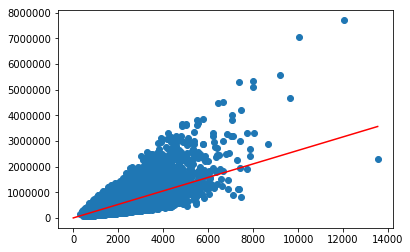

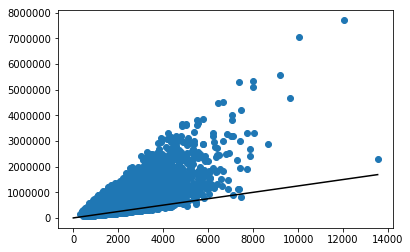

In [24]:
def make_plot(X, y, coef_, **kwargs):
    plt.figure()
    plt.scatter(X[:, 1], y)
    plot_x = np.linspace(0, X[:, 1].max(), 100)
    plt.plot(plot_x, predict_outcome(np.c_[np.ones(len(plot_x)), plot_x], 
                                     np.array(coef_)), **kwargs)
    plt.show()
    
make_plot(X_train, y_train, simple_weights_0_penalty, color='r')
make_plot(X_train, y_train, simple_weights_high_penalty, color='k')

In [25]:
print('{:6.3e}'.format(np.sum(np.square(y_test - predict_outcome(X_test, simple_weights_0_penalty)))))

2.757e+14


In [26]:
print('{:6.3e}'.format(np.sum(np.square(y_test - predict_outcome(X_test, simple_weights_high_penalty)))))

6.946e+14


In [30]:
features_2 = ['sqft_living', 'sqft_living15']
output = 'price'
X_2, y_2 = get_numpy_data(train_data, features_2, output)
X_2_test, y_2_test = get_numpy_data(test_data, features_2, output)
multiple_weights_0_penalty = ridge_regression_gradient_descent(X_2, y_2, [0., 0., 0.], step_size=1e-12, 
                                           l2_penalty=0., max_iterations=1000)
print(multiple_weights_0_penalty)

[  -0.35743483  243.05416982   22.41481497]


In [31]:
print('{:6.3e}'.format(np.sum(np.square(y_2_test - predict_outcome(X_2_test, multiple_weights_0_penalty)))))

2.741e+14


In [32]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(X_2, y_2, [0., 0., 0.], step_size=1e-12, 
                                           l2_penalty=1e11, max_iterations=1000)
print(multiple_weights_high_penalty)

[  6.74296579  91.48927365  78.43658766]


In [33]:
print('{:6.3e}'.format(np.sum(np.square(y_2_test - predict_outcome(X_2_test, multiple_weights_high_penalty)))))

5.004e+14


In [34]:
predict_outcome(X_2_test[0], multiple_weights_0_penalty)

387465.47605823539

In [35]:
predict_outcome(X_2_test[0], multiple_weights_high_penalty)

270453.53032194061

In [36]:
y_test[0]

310000.0